# Task 1: Exploratory Data Analysis (EDA)

This notebook performs comprehensive EDA on the Financial News and Stock Price Integration Dataset (FNSPID).

## Analysis Components:
1. **Descriptive Statistics**: Textual lengths, articles per publisher, publication dates
2. **Text Analysis**: Keywords, phrases, topic modeling
3. **Time Series Analysis**: Publication frequency over time, publishing times
4. **Publisher Analysis**: Publisher distribution, content analysis, domain analysis


## 1. Setup and Data Loading


In [1]:
import sys
import os
sys.path.append('../scripts')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Import custom modules
from load_data import load_financial_news_data, validate_data
from eda_descriptive_stats import (
    calculate_text_statistics,
    count_articles_per_publisher,
    analyze_publication_dates,
    plot_text_statistics,
    plot_publisher_analysis,
    plot_publication_trends
)
from eda_text_analysis import (
    extract_keywords,
    extract_phrases,
    identify_financial_keywords,
    perform_topic_modeling,
    display_topics,
    create_wordcloud,
    plot_keywords
)
from eda_time_series import (
    analyze_publication_frequency,
    analyze_publishing_times,
    identify_market_events,
    plot_publication_frequency,
    plot_publishing_times,
    plot_spikes
)
from eda_publisher_analysis import (
    analyze_publishers,
    identify_publisher_domains,
    analyze_publisher_content,
    analyze_publisher_timing,
    plot_publisher_distribution,
    plot_publisher_content_analysis,
    plot_domain_analysis
)


In [ ]:
# Load the dataset
data_path = '../data/raw_analyst_ratings.csv'

print("Loading financial news data...")
df = load_financial_news_data(data_path)
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
display(df.head())

# Note: This is a large dataset (1.4M+ rows)
# For faster initial exploration, you can sample the data:
# df_sample = df.sample(n=100000, random_state=42)  # Sample 100k rows
# Or filter by date range:
# df_sample = df[df['date'] >= '2019-01-01']  # Recent data only

# For text analysis, we'll use sampling within the functions to speed up processing
# You can also create a sample here if you want to use the same sample throughout:
# df_sample = df.sample(n=100000, random_state=42)


Loading financial news data...
Data loaded successfully!
Shape: (1407328, 5)

Columns: ['headline', 'url', 'publisher', 'date', 'stock']

First few rows:


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# Validate data
validation_report = validate_data(df)
print("Data Validation Report:")
print("=" * 50)
for key, value in validation_report.items():
    print(f"{key}: {value}")


Data Validation Report:
total_rows: 1407328
missing_values: {'headline': 0, 'url': 0, 'publisher': 0, 'date': 1351341, 'stock': 0}
duplicate_rows: 1
date_range: {'min': Timestamp('2011-04-27 21:01:48-0400', tz='UTC-04:00'), 'max': Timestamp('2020-06-11 17:12:35-0400', tz='UTC-04:00')}
unique_stocks: 6204
unique_publishers: 1034


## 2. Descriptive Statistics


In [4]:
# Calculate text statistics
text_stats, df_with_stats = calculate_text_statistics(df)
print("Text Statistics:")
print("=" * 50)
display(text_stats)


Text Statistics:


,headline_length,headline_word_count
mean,73.120515,11.416706
median,64.000000,10.000000
std,40.735310,6.352997
min,3.000000,1.000000
max,512.000000,77.000000
q25,47.000000,7.000000
q75,87.000000,13.000000


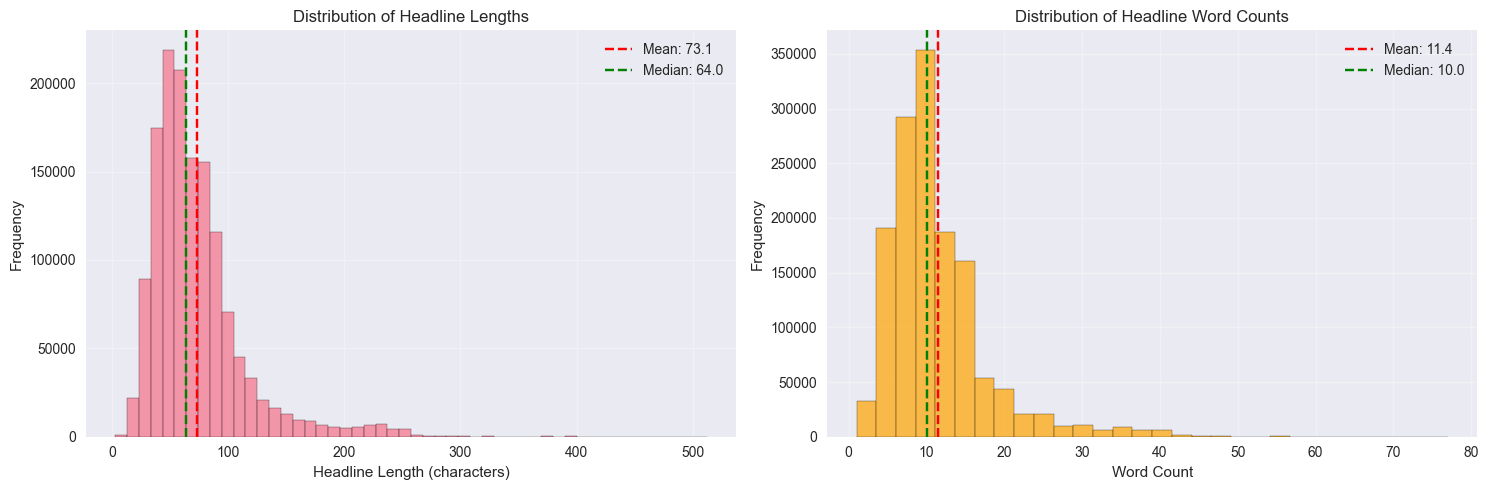

In [5]:
# Plot text statistics
plot_text_statistics(df_with_stats, save_path='../outputs/text_statistics.png')


In [6]:
# Count articles per publisher
publisher_counts = count_articles_per_publisher(df)
print("Top 20 Publishers:")
print("=" * 50)
display(publisher_counts.head(20))


Top 20 Publishers:


,publisher,article_count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


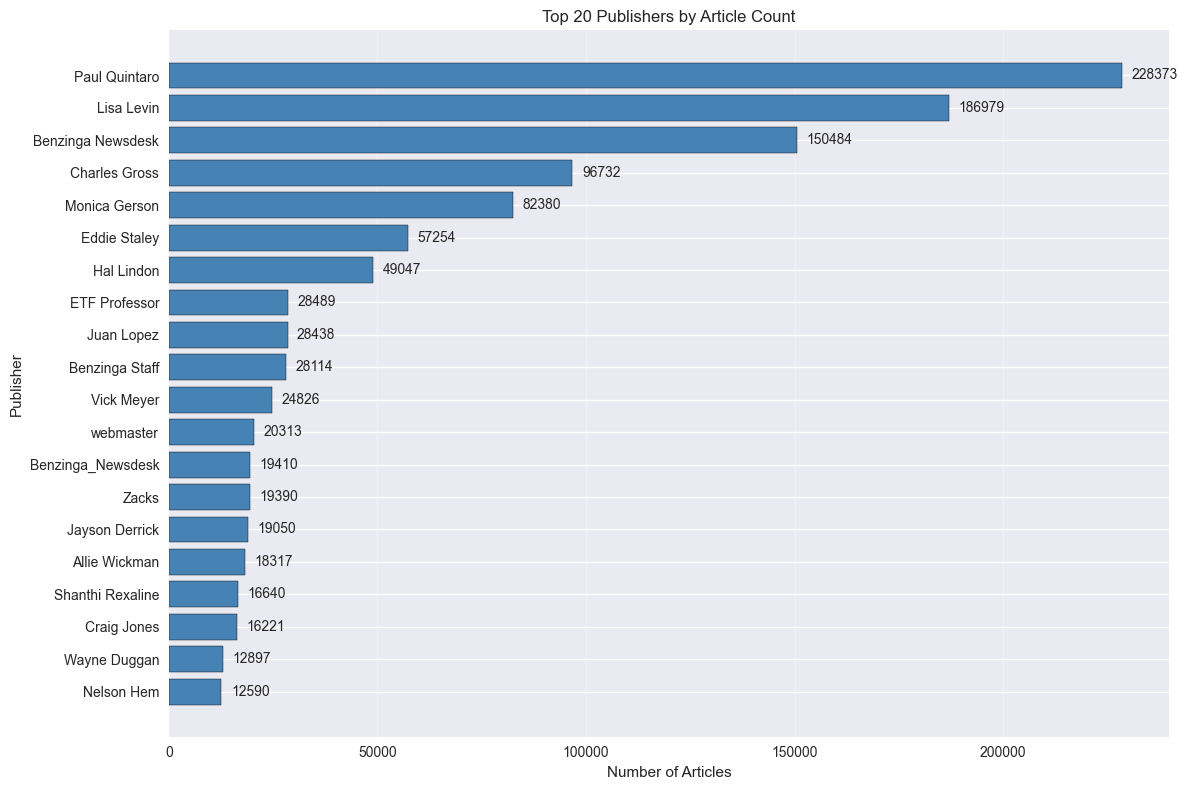

In [7]:
# Plot publisher analysis
plot_publisher_analysis(publisher_counts, top_n=20, save_path='../outputs/publisher_distribution.png')


In [8]:
# Analyze publication dates
date_analysis, df_with_dates = analyze_publication_dates(df)
print("Publication Date Analysis:")
print("=" * 50)
print(f"Total days covered: {date_analysis['total_days']}")
print(f"Date range: {date_analysis['date_range']['start']} to {date_analysis['date_range']['end']}")
print("\nArticles per weekday:")
for day, count in date_analysis['articles_per_weekday'].items():
    print(f"  {day}: {count}")


Publication Date Analysis:
Total days covered: 2528
Date range: 2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00

Articles per weekday:
  Thursday: 12688
  Wednesday: 11891
  Tuesday: 11002
  Monday: 10322
  Friday: 9381
  Sunday: 436
  Saturday: 267


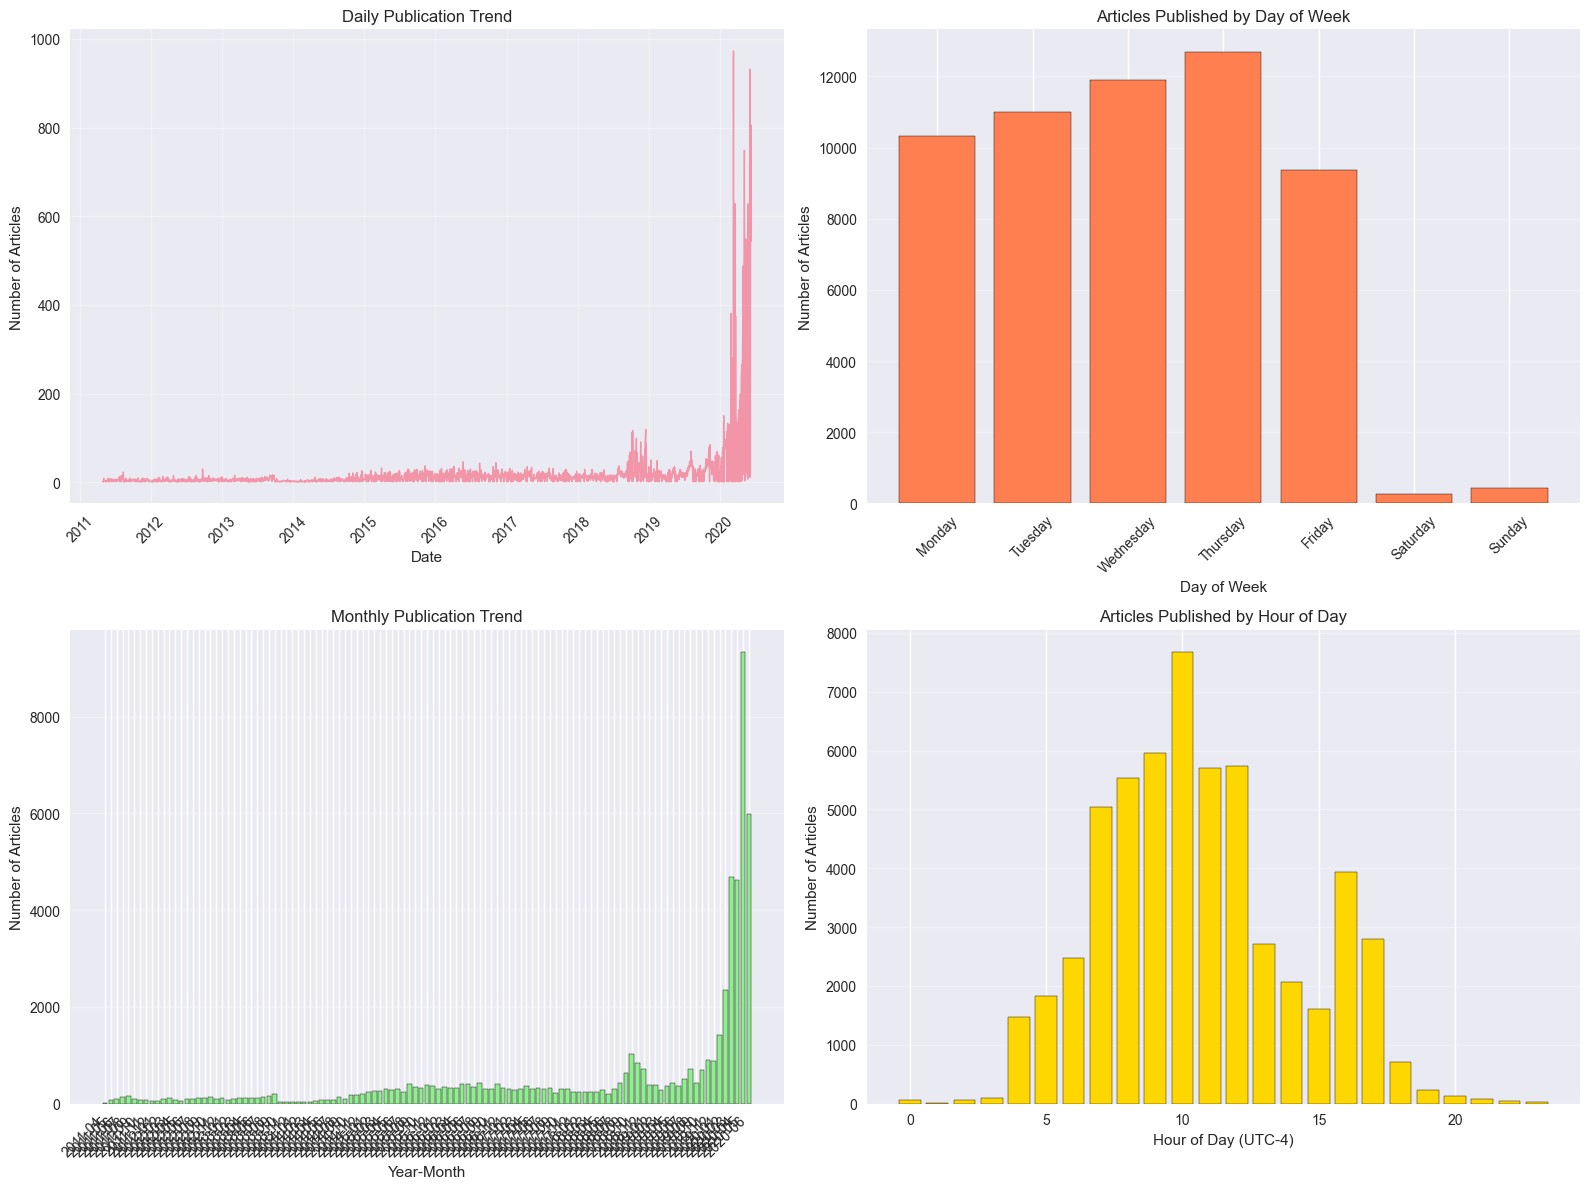

In [9]:
# Plot publication trends
plot_publication_trends(date_analysis, save_path='../outputs/publication_trends.png')


## 3. Text Analysis and Topic Modeling


In [ ]:
# Extract keywords
keywords_df = extract_keywords(df, top_n=50)
print("Top 50 Keywords:")
print("=" * 50)
display(keywords_df.head(20))


In [ ]:
# Plot keywords
plot_keywords(keywords_df, top_n=30, save_path='../outputs/top_keywords.png')


In [ ]:
# Extract phrases (bigrams)
bigrams_df = extract_phrases(df, n_grams=2, top_n=30)
print("Top 30 Bigrams:")
print("=" * 50)
display(bigrams_df)


In [ ]:
# Identify financial keywords
financial_keywords = identify_financial_keywords(df)
print("Financial Keywords Analysis:")
print("=" * 50)
for category, data in financial_keywords.items():
    print(f"\n{category.upper()}:")
    print(f"  Count: {data['count']}")
    print(f"  Percentage: {data['percentage']:.2f}%")
    if data['sample_headlines']:
        print(f"  Sample headlines:")
        for headline in data['sample_headlines'][:3]:
            print(f"    - {headline[:80]}...")


In [ ]:
# Create word cloud
try:
    create_wordcloud(df, save_path='../outputs/wordcloud.png')
except Exception as e:
    print(f"Word cloud creation failed: {e}")


In [ ]:
# Topic Modeling (if gensim is available)
try:
    print("Performing topic modeling...")
    lda_model, doc_topics = perform_topic_modeling(df, num_topics=10, passes=10)
    
    # Display topics
    topics_df = display_topics(lda_model, num_words=10)
    print("\nIdentified Topics:")
    print("=" * 50)
    display(topics_df)
except Exception as e:
    print(f"Topic modeling failed: {e}")
    print("Make sure gensim is installed: pip install gensim")


## 4. Time Series Analysis


In [ ]:
# Analyze publication frequency
frequency_analysis = analyze_publication_frequency(df)
print("Publication Frequency Statistics:")
print("=" * 50)
stats = frequency_analysis['statistics']
for key, value in stats.items():
    print(f"{key}: {value}")


In [ ]:
# Plot publication frequency
plot_publication_frequency(frequency_analysis, save_path='../outputs/publication_frequency.png')


In [ ]:
# Analyze publishing times
timing_analysis = analyze_publishing_times(df)
print("Publishing Time Analysis:")
print("=" * 50)
print(f"Most active hour: {timing_analysis['most_active_hour']}:00")
print(f"Least active hour: {timing_analysis['least_active_hour']}:00")
print("\nPeak hours:")
display(timing_analysis['peak_hours'])


In [ ]:
# Plot publishing times
plot_publishing_times(timing_analysis, save_path='../outputs/publishing_times.png')


In [ ]:
# Identify market events (publication spikes)
spikes = identify_market_events(df, spike_threshold=2.0)
print(f"Identified {len(spikes)} potential market events (publication spikes):")
print("=" * 50)
if len(spikes) > 0:
    display(spikes.head(10))
    plot_spikes(spikes.head(20), save_path='../outputs/market_events.png')
else:
    print("No significant spikes identified.")


## 5. Publisher Analysis


In [ ]:
# Analyze publishers
publisher_analysis = analyze_publishers(df)
print("Publisher Analysis Statistics:")
print("=" * 50)
stats = publisher_analysis['statistics']
for key, value in stats.items():
    print(f"{key}: {value}")


In [ ]:
# Plot publisher distribution
plot_publisher_distribution(publisher_analysis, top_n=20, save_path='../outputs/publisher_analysis.png')


In [ ]:
# Identify publisher domains
domain_counts = identify_publisher_domains(df)
print("Publisher Domain Analysis:")
print("=" * 50)
display(domain_counts.head(20))


In [ ]:
# Plot domain analysis
plot_domain_analysis(domain_counts, top_n=15, save_path='../outputs/domain_analysis.png')


In [ ]:
# Analyze publisher content
content_analysis = analyze_publisher_content(df, top_n=10)
print("Publisher Content Analysis:")
print("=" * 50)
content_df = pd.DataFrame(content_analysis).T
display(content_df)


In [ ]:
# Plot publisher content analysis
plot_publisher_content_analysis(content_analysis, save_path='../outputs/publisher_content.png')


In [ ]:
# Analyze publisher timing
timing_analysis_by_publisher = analyze_publisher_timing(df, top_n=10)
print("Publisher Timing Analysis:")
print("=" * 50)
timing_df = pd.DataFrame(timing_analysis_by_publisher).T
display(timing_df)


## 6. Summary and Insights


In [ ]:
print("EDA Summary")
print("=" * 50)
print(f"\nDataset Overview:")
print(f"  Total articles: {len(df)}")
print(f"  Date range: {df['date'].min()} to {df['date'].max()}")
print(f"  Unique publishers: {df['publisher'].nunique()}")
print(f"  Unique stocks: {df['stock'].nunique() if 'stock' in df.columns else 'N/A'}")

print(f"\nKey Insights:")
print(f"  1. Average headline length: {df_with_stats['headline_length'].mean():.1f} characters")
print(f"  2. Top publisher: {publisher_analysis['statistics']['top_publisher']} ({publisher_analysis['statistics']['top_publisher_percentage']:.1f}% of articles)")
print(f"  3. Most active publishing hour: {timing_analysis['most_active_hour']}:00")
print(f"  4. Market concentration (HHI): {publisher_analysis['statistics']['hhi']:.0f} ({publisher_analysis['statistics']['concentration_level']})")
